In [ ]:
# DeepLearning
# Pretrain model -> Already (Huge Amount Train (Image))
# 1. We dont have to start from scratch
# 2. The model is generalized on a Task (People , Car , ......)


In [ ]:
# patch

# 1. If any class object Present in Patch
# 2. Bounding box (regression)
# 3. Class label Logit


# NMS ( Non Maximum supression)-> Overlapping box -> smooth -> predicted box (merge)

# Custom Object Detection using YOLO - Fine-tuning Demo

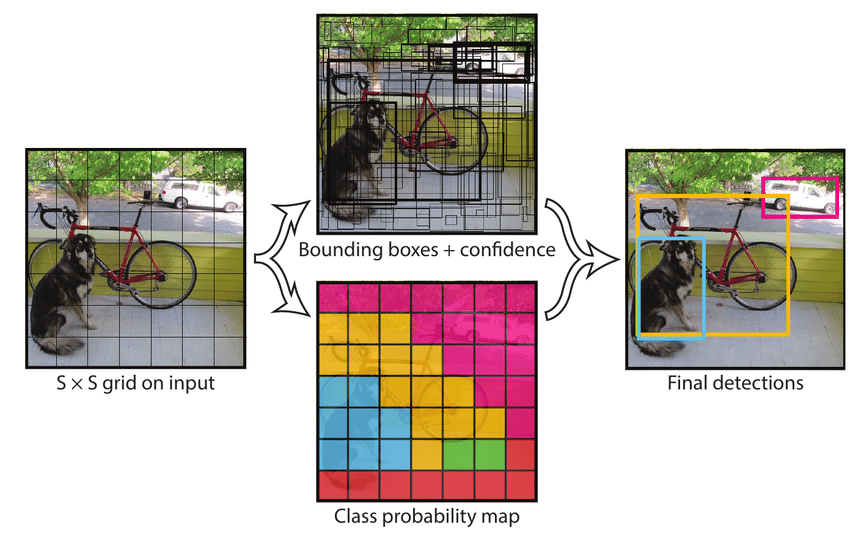

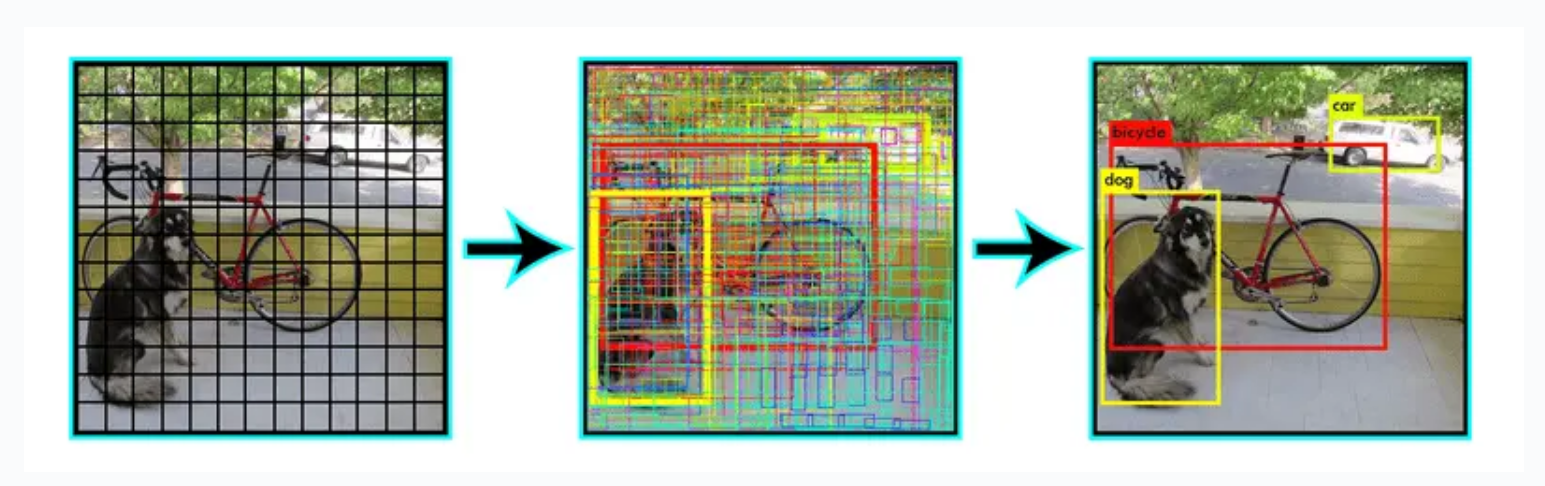



# --- SECTION 1: INTRODUCTION ---




In this notebook, we will:


1. **Run inference** with a pre-trained YOLO model on vehicle numberplate images (expect poor performance).
2. **Fine-tune YOLO** with a small custom dataset of Bangladeshi Vehicle Numberplate.
3. **Evaluate results** to see the improvements.
4. **Explore applications** of object detection in real-world scenarios.



# --- SECTION 2: SETUP ---

## Setup
We will install and import the required libraries.

In [ ]:
!pip install ultralytics
!matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.5 MB/s eta 0:00:00


In [ ]:
import os
import zipfile
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Current working directory
BASE_DIR = os.getcwd()

zip_file = os.path.join(
    BASE_DIR,
    "bangla-license-plate-detection.v1i.yolov11.zip"
)

extract_dir = os.path.join(BASE_DIR, "bangla-license-plate-detection")

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Dataset unzipped successfully")


✅ Dataset unzipped successfully


# --- SECTION 3: LOAD PRE-TRAINED MODEL ---

In [ ]:
# if "__file__" in globals():
#     BASE_DIR = os.path.dirname(os.path.abspath(__file__))
# else:
#     BASE_DIR = os.getcwd()

BASE_DIR = os.getcwd()

DATASET_DIR = os.path.join(BASE_DIR, "bangla-license-plate-detection")
DATA_YAML = os.path.join(DATASET_DIR, "data.yaml")
TEST_IMAGES_DIR = os.path.join(DATASET_DIR, "test", "images")

# Allowed image extensions
IMAGE_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".webp")

test_images = [
    f for f in os.listdir(TEST_IMAGES_DIR)
    if f.lower().endswith(IMAGE_EXTS)
]

if not test_images:
    raise FileNotFoundError("❌ No test images found in test/images directory")

TEST_IMAGE = os.path.join(TEST_IMAGES_DIR, test_images[0])

print(f"✅ Using test image: {TEST_IMAGE}")


✅ Using test image: /content/bangla-license-plate-detection/test/images/30_jpg.rf.2ac47441bfdc4424c423ad902612d305.jpg


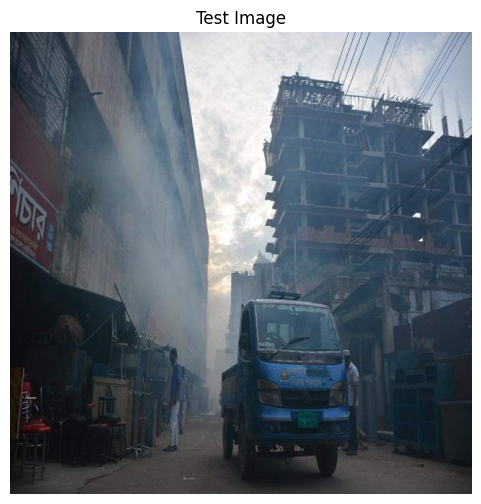

In [ ]:
# Load image
img = Image.open(TEST_IMAGE)

# Show image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.title("Test Image")
plt.show()

## Load Pre-trained YOLO Model
We start with a YOLOv11 model trained on COCO. It won't recognize Bangla numberplates, since it's not in the training set.

In [ ]:
pretrained_model = YOLO('yolo11n.pt') # nano model for quick demo

# --- SECTION 4: TEST ON VEHICLE IMAGE ---

## Test YOLO on Vehicle Images
Let's try detecting numberplate with the pre-trained model.

In [ ]:
print("🔍 Inference using pretrained YOLO11n model...")

pretrained_model.predict(
    source=TEST_IMAGE,
    save=True,
    conf=0.25,
    name="pretrained_inference"
)

🔍 Inference using pretrained YOLO11n model...

image 1/1 /content/bangla-license-plate-detection/test/images/30_jpg.rf.2ac47441bfdc4424c423ad902612d305.jpg: 640x640 1 person, 1 truck, 8.3ms
Speed: 4.9ms preprocess, 8.3ms inference, 47.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/pretrained_inference


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

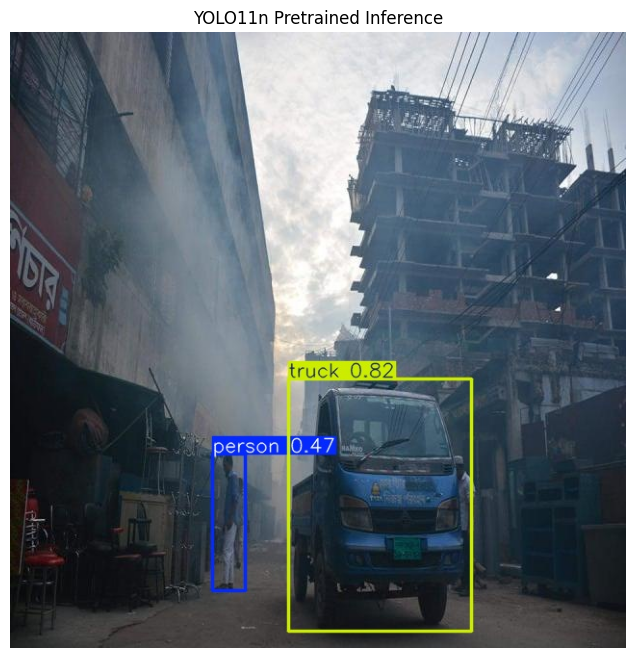

In [ ]:
# YOLO saves results here by default
OUTPUT_DIR = os.path.join(os.getcwd(), "runs", "detect", "pretrained_inference")

# The inference image file (same as TEST_IMAGE name)
inferred_image_path = os.path.join(OUTPUT_DIR, os.listdir(OUTPUT_DIR)[0])

# Load and display
img = Image.open(inferred_image_path)

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("YOLO11n Pretrained Inference")
plt.show()


## Fine-tuning YOLO
We now fine-tune YOLO with a small dataset of Bangla Numberplate images.


Dataset structure (YOLO format):

```
datasets/bangla-license-plate-detection/
├── train/
│ ├── images/
│ └── labels/
├── val/
│ ├── images/
│ └── labels/
```

In [ ]:

BASE_DIR = os.getcwd()

data_yaml = os.path.join(
    BASE_DIR,
    "bangla-license-plate-detection",
    "data.yaml"
)

# Load pretrained model
model = YOLO("yolo11n.pt")

# Train
model.train(
    data=data_yaml,
    epochs=50,
    imgsz=640,
    batch=16,
    name="bangla_license_plate_detector",
    device=0  # remove or set to "cpu" if no GPU
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/bangla-license-plate-detection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bangla_license_plate_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d07c85a83b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
# Optizimer -> Back Proparation

# --- SECTION 6: EVALUATION ---

In [ ]:
# best.pt -> weight -> FUll model


image 1/1 /content/bangla-license-plate-detection/test/images/30_jpg.rf.2ac47441bfdc4424c423ad902612d305.jpg: 640x640 1 numberplate, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/trained_inference


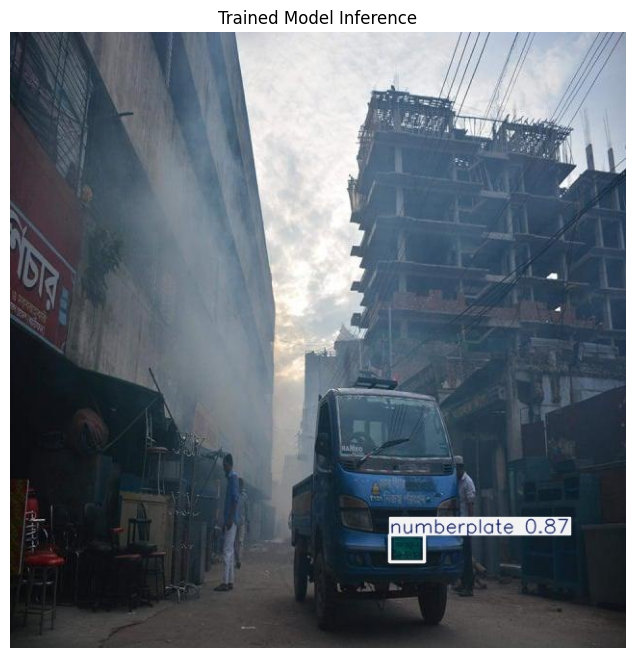

In [ ]:
BASE_DIR = os.getcwd()

# Path to trained model
trained_model_path = os.path.join(
    BASE_DIR,
    "runs",
    "detect",
    "bangla_license_plate_detector",
    "weights",
    "best.pt"
)

# Load trained model
trained_model = YOLO(trained_model_path)

# Path to test image (same one as before)
TEST_IMAGES_DIR = os.path.join(BASE_DIR, "bangla-license-plate-detection", "test", "images")
TEST_IMAGE = os.path.join(TEST_IMAGES_DIR, os.listdir(TEST_IMAGES_DIR)[0])

# Run inference
results = trained_model.predict(
    source=TEST_IMAGE,
    save=True,          # saves output in runs/detect/
    conf=0.25,
    name="trained_inference"
)

# Display the inference image inline
OUTPUT_DIR = os.path.join(BASE_DIR, "runs", "detect", "trained_inference")
inferred_image_path = os.path.join(OUTPUT_DIR, os.listdir(OUTPUT_DIR)[0])

img = Image.open(inferred_image_path)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Trained Model Inference")
plt.show()


In [ ]:
# post process -> OCR-> Vision Model (Qwen ,llava) / LLM (Gemini) -> Extract text from image

# Object tracking (object)
# Object Segment (application)
# Traffic Sign Detection (application)

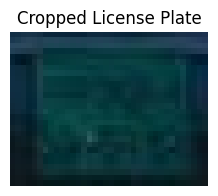

In [ ]:
# Load image with PIL
img = Image.open(TEST_IMAGE)

# Get the first detection (assuming one license plate per image)
if len(results[0].boxes) == 0:
    print("❌ No license plate detected")
else:
    box = results[0].boxes.xyxy[0]  # x1, y1, x2, y2
    x1, y1, x2, y2 = box.cpu().numpy()  # convert to numpy if on GPU

    # Crop
    cropped_plate = img.crop((int(x1), int(y1), int(x2), int(y2)))

    # Show cropped license plate
    plt.figure(figsize=(4, 2))
    plt.imshow(cropped_plate)
    plt.axis("off")
    plt.title("Cropped License Plate")
    plt.show()
